In [ ]:
# Importing the required packages and libraries
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Loading the image from the URL and converting it to a NumPy array
img_url = "https://raw.githubusercontent.com/xinntao/ESRGAN/master/LR/comic.png"
response = requests.get(img_url)

if response.status_code == 200:
    img_array = np.asarray(bytearray(response.content), dtype=np.uint8)



In [ ]:
# Decode the image using OpenCV and convert the color from BGR to RGB
image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
if image is not None:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

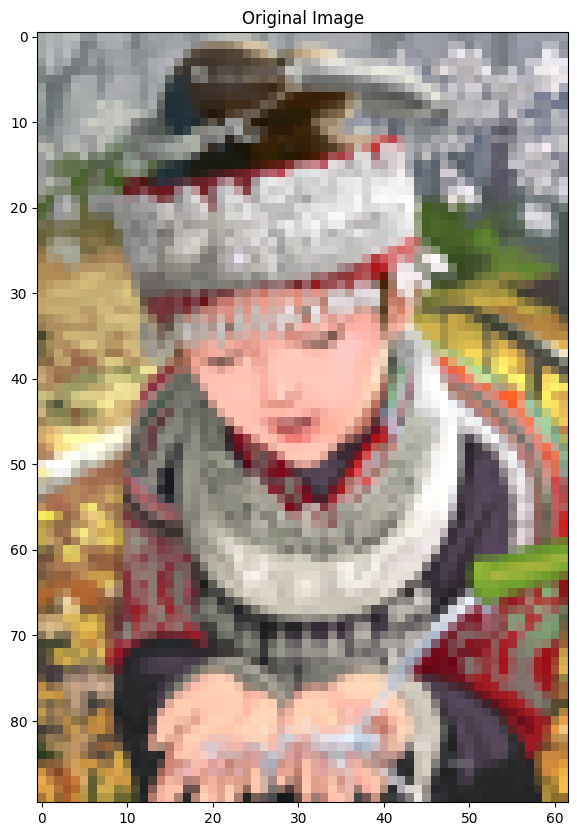

In [ ]:
# Display the original image
if image is not None:
    plt.figure(figsize=(10, 10))
    plt.title("Original Image")
    plt.imshow(image_rgb)
    plt.show()
else:
    print("Error: Image decoding failed.")

In [ ]:
# Preprocessing function: Crop and prepare the image for ESRGAN model
def preprocessing(img):
    # Ensure image size is a multiple of 4 for ESRGAN model
    img_size = tf.convert_to_tensor(img.shape[:-1]) // 4 * 4
    cropped_img = tf.image.crop_to_bounding_box(img, 0, 0, img_size[0], img_size[1])
    # Cast the image to float32 and normalize pixel values
    preprocessed_img = tf.cast(cropped_img, tf.float32)
    # Add an extra dimension for batch processing
    return tf.expand_dims(preprocessed_img, axis=0)

# Load the pre-trained ESRGAN model from TensorFlow Hub
esrgan_model_url = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

In [ ]:
# Ensure the model is loaded
try:
    model = hub.load(esrgan_model_url)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading the model: {e}")


Model loaded successfully.


In [ ]:
# Function to apply super-resolution using the ESRGAN model
def super_resolve(img):
    preprocessed_image = preprocessing(img)

    # Run the model on the preprocessed image
    sr_image = model(preprocessed_image)

    # Remove the extra batch dimension and normalize pixel values
    return tf.squeeze(sr_image) / 255.0


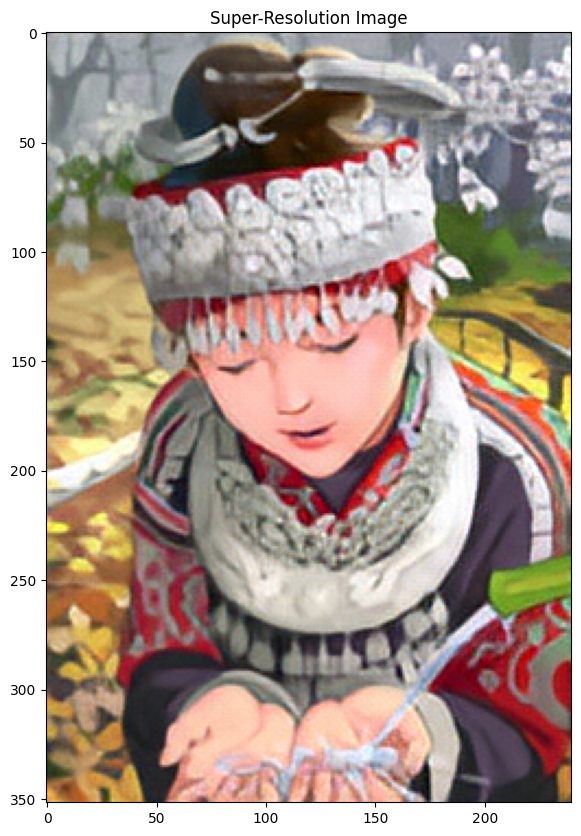

In [ ]:
# Apply super-resolution to the image if it's properly loaded
if 'image_rgb' in locals() and 'model' in locals():
    image_rgb_tensor = tf.convert_to_tensor(image_rgb, dtype=tf.float32)
    sr_image = super_resolve(image_rgb_tensor)

    # Display the high-resolution image
    plt.figure(figsize=(10, 10))
    plt.title("Super-Resolution Image")
    plt.imshow(sr_image)
    plt.show()
else:
    print("Super-resolution could not be performed.")
